## Warnings Filtering

In this analysis, we use warnings filtering to suppress specific types of warnings that may clutter the output. This is helpful when you want to focus on important results and avoid unnecessary warnings in the notebook.

### Steps:
1. Use the `warnings.simplefilter()` function to ignore specific types of warnings.
2. In this case, we are ignoring `FutureWarning` and `UserWarning` types, which might appear when using deprecated features or custom user warnings.

In [22]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)


# IPL Matches Analysis (2008-2024)

This project explores and analyzes the **IPL Matches Dataset (2008-2024)** to uncover key insights, trends, and statistics about the Indian Premier League. The analysis is performed using Python and Jupyter Notebook.


### Load the Dataset

We begin by loading the IPL matches dataset using the `pandas` library. The dataset is stored in a CSV file named `matches.csv`.

- Import the required libraries (`pandas`, `seaborn`, `matplotlib` in this case).


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Use the `read_csv()` function to load the data.
- Use the `head()` function to display the first few rows of the dataset for an initial overview.

In [24]:
df = pd.read_csv('archive/matches.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


- Use the `info()` function for information.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## Viewing the Dataset Columns

To understand the structure of the dataset, we first examine the column names. This helps identify the available features in the IPL matches dataset.

In [26]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

## Total Matches Played Per Season

To understand the growth and frequency of matches in the IPL, we calculate the total number of matches played in each season.

In [27]:
df.groupby('season')['id'].count().reset_index()

,season,id
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


## Total Matches Played Per Season (Visualization)

To better understand the distribution of matches across seasons, we use a bar chart for visualization.

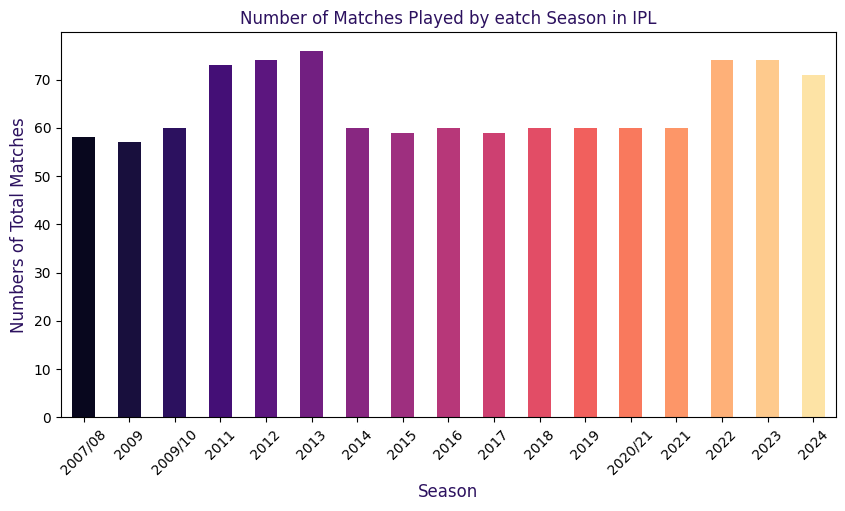

In [28]:
matchCount = df.groupby('season')['id'].count()

colors = sns.color_palette("magma", n_colors=len(matchCount))
textcolor = sns.color_palette("magma", n_colors=5)[0]

plt.figure(figsize=(10, 5))
matchCount.plot(
    kind='bar',
    color=colors,
)
plt.title("Number of Matches Played by eatch Season in IPL", color=textcolor, fontsize=12)
plt.xlabel("Season", color=textcolor, fontsize=12)
plt.ylabel("Numbers of Total Matches", color=textcolor, fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Number of Matches Won by Each Team Across All Seasons 
`( Before data cleaning of the same franchisee )`

To analyze the performance of teams, we calculate the total number of matches won by each team across all IPL seasons.

In [29]:
df.groupby('winner')['season'].count().reset_index()

,winner,season
0,Chennai Super Kings,138
1,Deccan Chargers,29
2,Delhi Capitals,48
3,Delhi Daredevils,67
4,Gujarat Lions,13
5,Gujarat Titans,28
6,Kings XI Punjab,88
7,Kochi Tuskers Kerala,6
8,Kolkata Knight Riders,131
9,Lucknow Super Giants,24


## Number of Matches Won by Each Team Across All Seasons (Visualization)
`( Before data cleaning of the same franchisee )`

To analyze the performance of teams, we calculate the total number of matches won by each team across all IPL seasons, we use a barh chart for visualization.

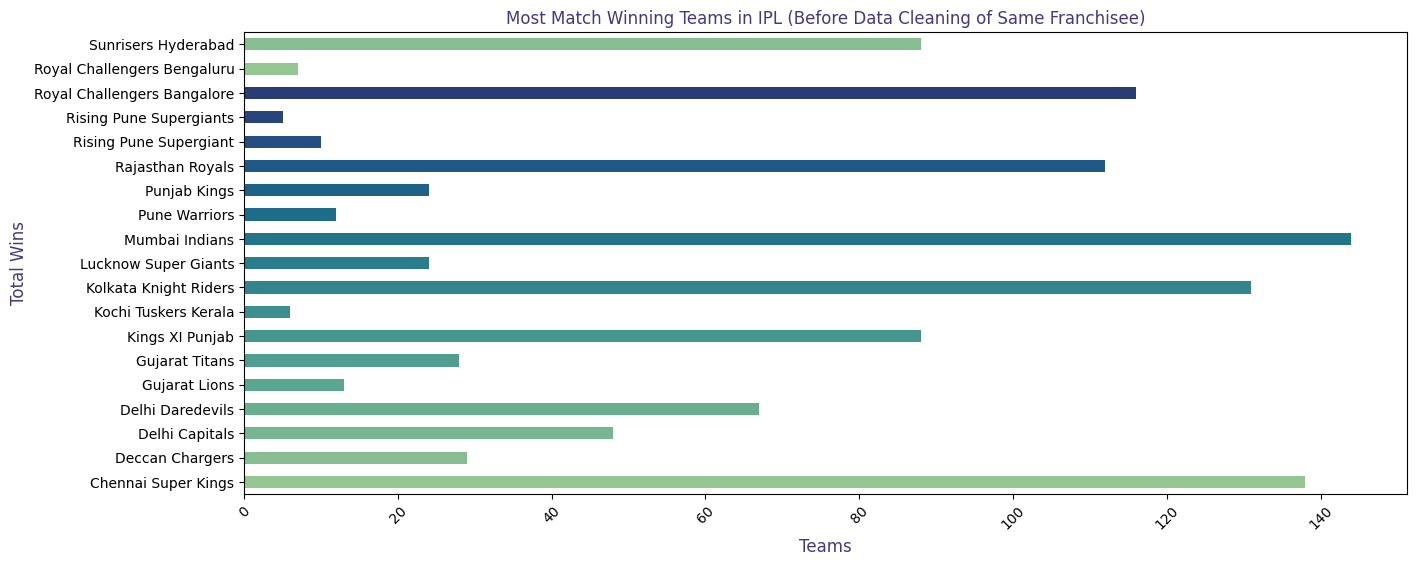

In [30]:
beforeMostWin = df.groupby('winner')['season'].count()
colors = sns.color_palette("crest", n_colors=len(matchCount))
textcolor = sns.color_palette("viridis", n_colors=5)[0]

plt.figure(figsize=(15, 6))
beforeMostWin.plot(
    kind='barh',
    color=colors,
)
plt.title("Most Match Winning Teams in IPL (Before Data Cleaning of Same Franchisee)", color=textcolor, fontsize=12)
plt.xlabel("Teams", color=textcolor, fontsize=12)
plt.ylabel("Total Wins", color=textcolor, fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Number of Matches Won by Each Team Across All Seasons 
`( After data cleaning of the same franchisee )`

To analyze the performance of teams, we calculate the total number of matches won by each team across all IPL seasons.

In [31]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Chennai Super Kings': 'Chennai Super Kings',
    'Deccan Chargers': 'Deccan Chargers',
    'Gujarat Lions': 'Gujarat Titans',
    'Kings XI Punjab': 'Punjab Kings',
    'Kochi Tuskers Kerala': 'Kochi Tuskers Kerala',
    'Kolkata Knight Riders': 'Kolkata Knight Riders',
    'Lucknow Super Giants': 'Lucknow Super Giants',
    'Mumbai Indians': 'Mumbai Indians',
    'Pune Warriors': 'Pune Warriors',
    'Rajasthan Royals': 'Rajasthan Royals',
    'Sunrisers Hyderabad': 'Sunrisers Hyderabad'
}

df['team1'] = df['team1'].replace(team_name_mapping)
df['team2'] = df['team2'].replace(team_name_mapping)
df['winner'] = df['winner'].replace(team_name_mapping)

df.groupby('winner')['season'].count().reset_index()


,winner,season
0,Chennai Super Kings,138
1,Deccan Chargers,29
2,Delhi Capitals,115
3,Gujarat Titans,41
4,Kochi Tuskers Kerala,6
5,Kolkata Knight Riders,131
6,Lucknow Super Giants,24
7,Mumbai Indians,144
8,Pune Warriors,12
9,Punjab Kings,112


## Number of Matches Won by Each Team Across All Seasons (Visualization)
`( After data cleaning of the same franchisee )`

To analyze the performance of teams, we calculate the total number of matches won by each team across all IPL seasons, we use a barh chart for visualization.

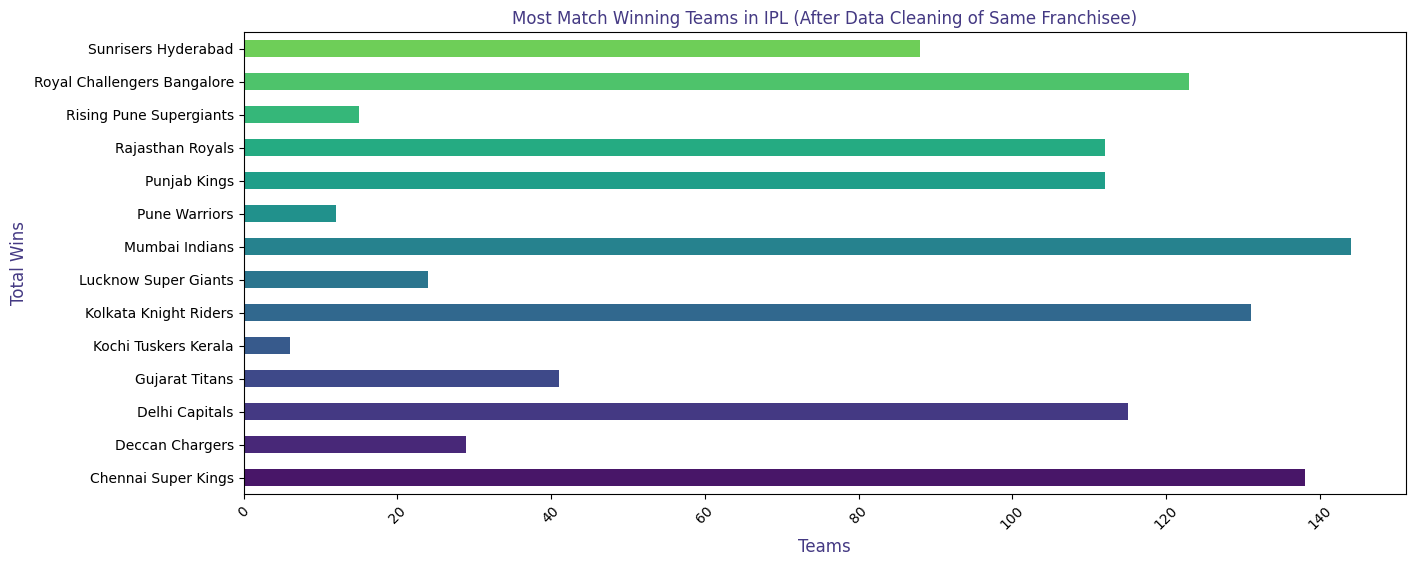

In [32]:
afterMostWin = df.groupby('winner')['season'].count()
colors = sns.color_palette("viridis", n_colors=len(matchCount))
textcolor = sns.color_palette("viridis", n_colors=5)[0]

plt.figure(figsize=(15, 6))
afterMostWin.plot(
    kind='barh',
    color=colors,
)
plt.title("Most Match Winning Teams in IPL (After Data Cleaning of Same Franchisee)", color=textcolor, fontsize=12)
plt.xlabel("Teams", color=textcolor, fontsize=12)
plt.ylabel("Total Wins", color=textcolor, fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Match Type vs. Winners Analysis

This analysis examines the number of matches won by each team based on different match types (e.g., league matches, playoffs, finals). It provides a deeper understanding of team performance in various match contexts.

In [33]:
df.groupby(['match_type', 'winner'])['season'].count().unstack().fillna(0)

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
match_type,,,,,,,,,,,,,,
3rd Place Play-Off,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Elimination Final,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Eliminator,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0
Final,5.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0
League,121.0,27.0,113.0,38.0,6.0,121.0,24.0,131.0,12.0,111.0,107.0,14.0,117.0,82.0
Qualifier 1,5.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
Qualifier 2,3.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,3.0
Semi Final,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Visualizing Wins by Match Type and Team

In this analysis, we examine the number of wins by each team across different match types (e.g., league matches, playoffs, finals). The goal is to visualize the distribution of wins by each team in various match contexts.

### Steps:
1. Group the dataset by `match_type` and `winner` to count the number of wins.
2. Use the `unstack()` method to pivot the data and make `winner` the columns.
3. Fill any missing values with 0 using `fillna()`.
4. Visualize the results using a heatmap, where the intensity of the colors reflects the number of wins.

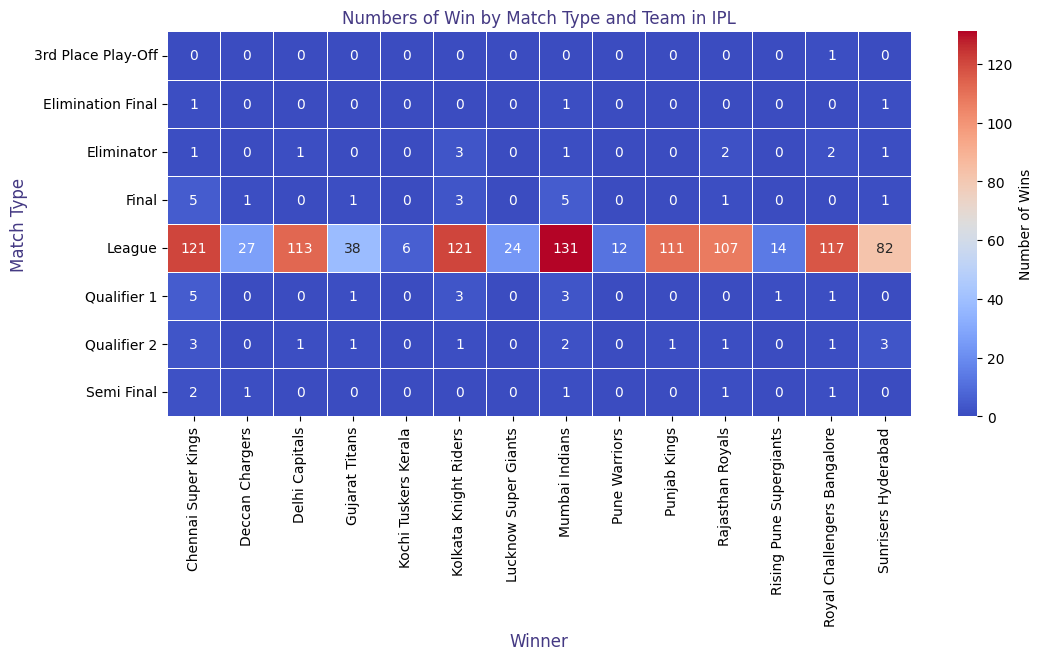

In [34]:
matchTypeTeam = df.groupby(['match_type', 'winner'])['season'].count().unstack().fillna(0)
plt.figure(figsize=(12, 5))
sns.heatmap(
    matchTypeTeam,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Number of Wins'} 
)
plt.title("Numbers of Win by Match Type and Team in IPL", color=textcolor, fontsize=12)
plt.xlabel("Winner", color=textcolor, fontsize=12)
plt.ylabel("Match Type", color=textcolor, fontsize=12)
plt.show()

## Head-to-Head Matches Analysis

In this analysis, we calculate the number of times each team has defeated another team in IPL history. This provides a head-to-head comparison of team performances across all seasons.

In [35]:
headTOhead = pd.DataFrame(0, index=df['team1'].unique(), columns=df['team2'].unique(), dtype=int)

for _, row in df.iterrows():
    winner = row['winner']
    team1 = row['team1']
    team2 = row['team2']

    if winner == team1:
        headTOhead.loc[team1, team2] += 1
    elif winner == team2:
        headTOhead.loc[team2, team1] += 1

headTOhead

,Kolkata Knight Riders,Chennai Super Kings,Rajasthan Royals,Royal Challengers Bangalore,Deccan Chargers,Punjab Kings,Delhi Capitals,Mumbai Indians,Kochi Tuskers Kerala,Pune Warriors,Sunrisers Hyderabad,Rising Pune Supergiants,Gujarat Titans,Lucknow Super Giants
Royal Challengers Bangalore,14,11,15,0,5,16,19,14,2,5,11,2,6,3
Punjab Kings,12,14,12,17,7,0,17,15,1,3,7,2,4,1
Delhi Capitals,15,11,14,11,7,16,0,16,1,3,11,2,6,2
Mumbai Indians,23,20,15,19,6,17,19,0,0,5,13,2,4,1
Kolkata Knight Riders,0,10,14,20,7,21,18,11,0,4,19,3,2,2
Rajasthan Royals,14,13,0,14,7,16,15,14,1,4,9,0,1,4
Deccan Chargers,2,4,2,6,0,3,4,4,1,3,0,0,0,0
Chennai Super Kings,19,0,16,21,6,16,19,17,1,4,15,0,3,1
Kochi Tuskers Kerala,2,1,1,0,0,0,1,1,0,0,0,0,0,0
Pune Warriors,1,2,1,0,1,3,2,1,1,0,0,0,0,0


## Head-to-Head Wins by Each Team (Small Multiples)

In this analysis, we visualize the head-to-head match wins for each team against every other team using a series of bar plots (small multiples). This allows us to easily compare how each team has performed against different opponents.

### Steps:
1. Convert the head-to-head DataFrame from wide to long format using `stack()`. This makes it easier to plot the data.
2. Create a `FacetGrid` using Seaborn to generate individual bar plots for each team (each team’s wins against others).
3. Map a bar plot for each team's head-to-head win count against other teams.
4. Adjust titles, labels, and x-axis label rotation for clarity.


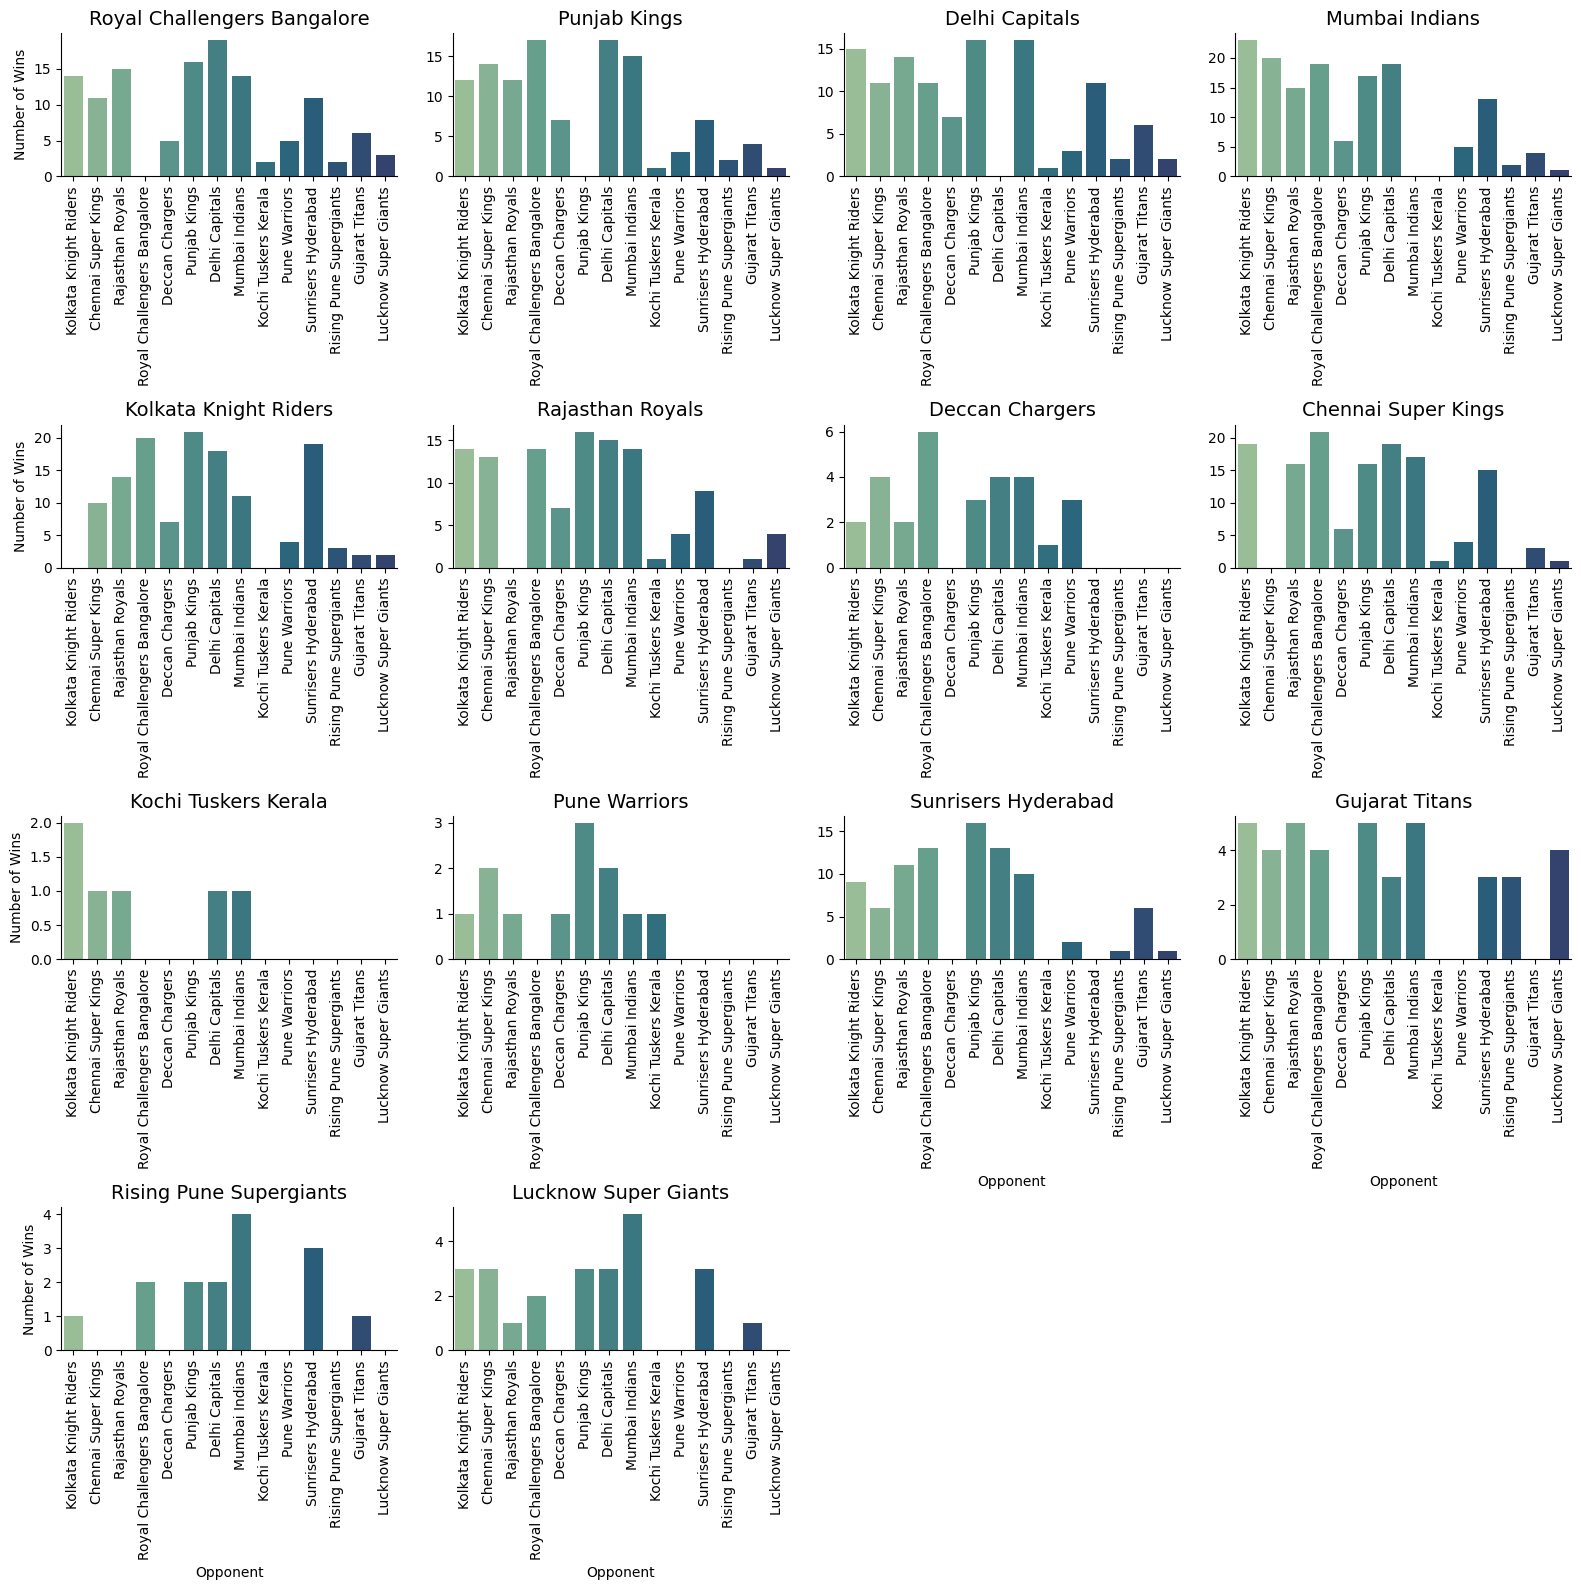

In [36]:
# Prepare the data for plotting (long format)
head_to_head_long = headTOhead.stack().reset_index()
head_to_head_long.columns = ['Team1', 'Team2', 'Wins']

# Set up the small multiples grid
g = sns.FacetGrid(head_to_head_long, col="Team1", col_wrap=4, height=4, sharex=False, sharey=False)

# Plotting each team's head-to-head win counts against others
g.map(sns.barplot, 'Team2', 'Wins', palette='crest')

# Adjust the titles and labels
g.set_titles("{col_name}", size=14)
g.set_axis_labels("Opponent", "Number of Wins")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()


## Top 10 Players of the Match in IPL

In this analysis, we calculate the top 10 players who have been awarded the "Player of the Match" title the most number of times across all IPL seasons.

In [37]:
df.groupby('player_of_match')['season'].count().sort_values(ascending=False).reset_index().head(10)

,player_of_match,season
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,SR Watson,16
7,YK Pathan,16
8,RA Jadeja,16
9,AD Russell,15


## Top 10 Players of the Match (Pie Chart)

In this analysis, we visualize the top 10 players who have been awarded the "Player of the Match" title the most number of times across all IPL seasons using a pie chart. This chart highlights the contribution of each player in terms of the number of awards.

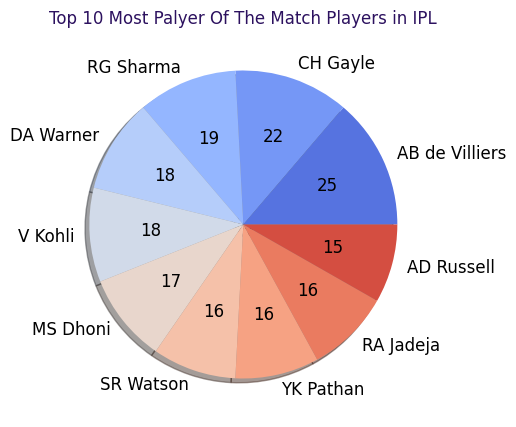

In [38]:
mostPOM = df.groupby('player_of_match')['season'].count().sort_values(ascending=False).head(10)
colors = sns.color_palette("coolwarm", n_colors=len(mostPOM))
textcolor = sns.color_palette("magma", n_colors=5)[0]

plt.figure(figsize=(5, 5))
mostPOM.plot(
    kind='pie',
    autopct=lambda pct: f"{int(round(pct / 100.0 * mostPOM.sum()))}",
    colors=colors,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
    )
plt.title('Top 10 Most Palyer Of The Match Players in IPL', color=textcolor, fontsize=12)
plt.ylabel('')
plt.show()

## Toss Winner Team Winning Percentage

In this analysis, we calculate the percentage of matches where the team that won the toss also went on to win the match. This gives insight into whether winning the toss has any correlation with winning the match.


In [39]:
df['toss_win'] = df['toss_winner'] == df['winner']
tossWin = df['toss_win'].mean() * 100
print(f'Toss Winner Team Winning Percentage = {tossWin:.2f}%')

Toss Winner Team Winning Percentage = 42.37%


## Toss Decision and Winning Percentage

In this analysis, we explore how the toss decision (whether the team chose to bat or bowl first after winning the toss) affects the chances of winning the match. We calculate the winning percentage for each toss decision type (bat or bowl).

In [40]:
df.groupby('toss_decision')['toss_win'].mean() * 100

toss_decision
bat      40.664962
field    43.323864
Name: toss_win, dtype: float64

## Impact of Toss Decision on Match Win Percentage (Pie Chart)

In this analysis, we visualize the impact of the toss decision (whether a team chooses to bat or bowl first) on the winning percentage. The pie chart shows how each toss decision (bat or bowl) affects the likelihood of winning the match.

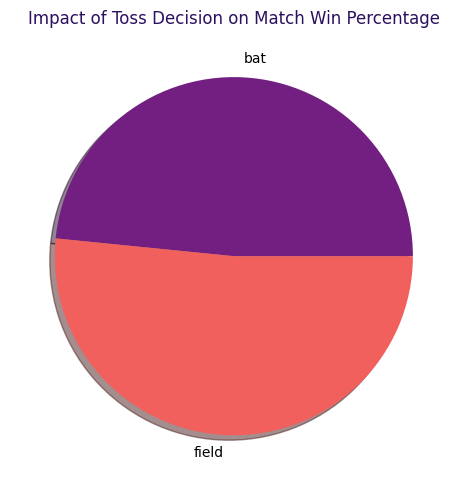

In [41]:
winImpactByToss = df.groupby('toss_decision')['toss_win'].mean() * 100

plt.figure(figsize=(5, 5))
winImpactByToss.plot(
    kind='pie',
    shadow=True,
    colors=sns.color_palette("magma", n_colors=len(winImpactByToss))
)

plt.title('Impact of Toss Decision on Match Win Percentage', color=textcolor, fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

## Number of Matches with Super Overs (2008 - 2024)

In this analysis, we calculate the total number of matches that involved a Super Over, which is a tie-breaking method used in the IPL.


In [42]:
df[df['super_over'] == 'Y'][['super_over']].count()

super_over    14
dtype: int64